1. Write a program that uses an if-else ladder

In [4]:
shopping_budget = [3400,12000,4500,24499,10000,5000]
my_budget = 5000
for budget in shopping_budget:
    if budget<my_budget:
        print("I'll be selecting one of these dresses: ", budget)
    elif budget == my_budget:
        print("This is my threshold: ", budget)
    else:
        print("No thanks, I'm broke!: ", budget)

I'll be selecting one of these dresses:  3400
No thanks, I'm broke!:  12000
I'll be selecting one of these dresses:  4500
No thanks, I'm broke!:  24499
No thanks, I'm broke!:  10000
This is my threshold:  5000


2. Write five different functions and call them in one program

In [7]:
from math import sqrt
def summ(a,b):
    return a+b
def diff(a,b):
    return a-b
def mult(a,b):
    return a*b
def div(a,b):
    return a/b
def sqr(a):
    return sqrt(a)
print("The sum of two numbers is: ",summ(4,7))
print("The difference between two numbers is: ",diff(13,8))
print("The product of two numbers is: ",mult(98,8))
print("Quoitent of two numbers: ",div(25,5))
print("The square root is: ", sqr(81))

The sum of two numbers is:  11
The difference between two numbers is:  5
The product of two numbers is:  784
Quoitent of two numbers:  5.0
The square root is:  9.0


3. Read any dataset from https://archive.ics.uci.edu/ml/index.php and perform a missing value 
treatment, check for distribution of each variable, find the correlation matrix and write 
conclusions from the matrix.


In [10]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv('accelerometer.csv')

In [25]:
df.head()

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


In [26]:
df.tail()

,wconfid,pctid,x,y,z
152995,3,100,1.051,0.090,-0.262
152996,3,100,0.918,0.039,-0.129
152997,3,100,1.156,-0.094,-0.227
152998,3,100,0.934,0.203,-0.172
152999,3,100,1.199,-0.176,0.109


In [13]:
df.isna().sum()

wconfid    0
pctid      0
x          0
y          0
z          0
dtype: int64

In [14]:
#There are no missing values in this dataset

In [16]:
#To find out the distribution of each variable

array([[<AxesSubplot:title={'center':'x'}>]], dtype=object)

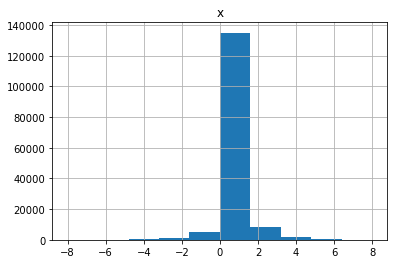

In [20]:
df.hist(column = 'x')

array([[<AxesSubplot:title={'center':'y'}>]], dtype=object)

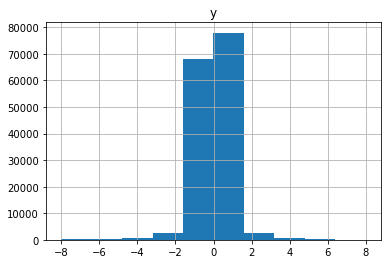

In [21]:
df.hist(column = 'y')

array([[<AxesSubplot:title={'center':'z'}>]], dtype=object)

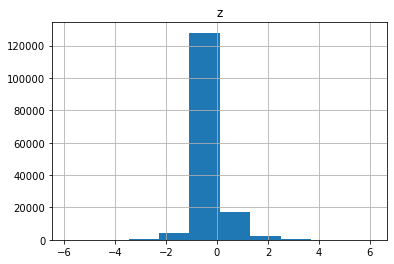

In [22]:
df.hist(column = 'z')

In [23]:
#These variables follow normal distribution

To test for normality: Shapiro-Wilk test 

H0: Distribution of the sample is not significantly different from the normal distribution

H1: Distribution of the sample is significantly different from the normal distribution

In [32]:
from scipy.stats import shapiro
x = shapiro(df['x'])
x

ShapiroResult(statistic=0.586978554725647, pvalue=0.0)

In [33]:
y = shapiro(df['y'])
y

ShapiroResult(statistic=0.6125532388687134, pvalue=0.0)

In [34]:
z = shapiro(df['y'])
z

ShapiroResult(statistic=0.6125532388687134, pvalue=0.0)

Since p-value is zero for all the three variables which is less than 0.05, we reject the null hypothesis and conclude that the variables follow normal distribution.

In [24]:
df.corr()

,wconfid,pctid,x,y,z
wconfid,1.000000e+00,1.035463e-15,-0.006065,0.005371,0.002228
pctid,1.035463e-15,1.000000e+00,0.002128,0.002882,0.008964
x,-6.065048e-03,2.128479e-03,1.000000,0.021137,-0.091164
y,5.371007e-03,2.881727e-03,0.021137,1.000000,-0.027716
z,2.228362e-03,8.964497e-03,-0.091164,-0.027716,1.000000


We see here that there is not much correlation between the x,y and z values. 

x&y : Very slight positive correlation

x&z : Slight negative correlation

y&z : Very slight negative correlation

4. Read the dataset and perform slicing in different ways 

In [35]:
df.loc[:, ['x','y']]

,x,y
0,1.004,0.090
1,1.004,-0.043
2,0.969,0.090
3,0.973,-0.012
4,1.000,-0.016
...,...,...
152995,1.051,0.090
152996,0.918,0.039
152997,1.156,-0.094
152998,0.934,0.203


In [37]:
df.iloc[2:3]

,wconfid,pctid,x,y,z
2,1,20,0.969,0.09,-0.121


In [41]:
df.sort_index().loc[1:2]

,wconfid,pctid,x,y,z
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121


In [42]:
df.iloc[[1,2,4],[2,4]]

,x,z
1,1.004,-0.125
2,0.969,-0.121
4,1.000,-0.121


In [45]:
df.loc[lambda df: [0,1]]

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125


In [46]:
df[lambda df: df.columns[0]]

0         1
1         1
2         1
3         1
4         1
         ..
152995    3
152996    3
152997    3
152998    3
152999    3
Name: wconfid, Length: 153000, dtype: int64

5. Can we find correlation between two categorical variables? How?

No, we cannot find the correlation between two categorical variables, because, intuitively, in the correlation formual, you take the sum of responses, and a sum doesn't make sense in the cases of categorical values. For example: Let's say we have the data where one column represents two genders, taking the sum of that does not make sense.
Therefore, we cannot find the correlation between two categorical variables.